In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [10]:
data,target = datasets.make_blobs(n_samples=200,centers=3,cluster_std = 2.75,random_state=123)
data
#target

array([[  2.00651759,  -3.37159145],
       [  3.00810412,  -1.44164854],
       [  5.9571473 ,  -0.17770022],
       [ -6.40144065,   0.42694316],
       [  1.52893147,   3.18947458],
       [  3.28548972,   0.31423022],
       [ -7.5565301 ,   1.03631956],
       [  0.7577223 ,  -3.37932195],
       [  5.10128697,  -8.6920901 ],
       [ -4.5758849 ,  -0.16766255],
       [  7.12544485,  -7.29452168],
       [ -3.71412849,   1.80895371],
       [  3.58773594,  -0.86307743],
       [  1.43377126,   0.30000059],
       [  2.45243849,   0.52630647],
       [  3.03920562,  -5.13807541],
       [  8.60812769,  -2.99513457],
       [  0.73441262,  -0.77327809],
       [ -3.86923149,   2.62044227],
       [  6.69053193,  -3.2152007 ],
       [ -4.61766433,  -0.6545743 ],
       [  3.49876499,  -2.05568716],
       [  5.42590971,  -4.6142837 ],
       [  9.5478309 ,  -0.39471081],
       [  6.16332237,  -2.9029279 ],
       [  7.38128649,  -6.17160301],
       [ -0.48849183,  -2.65853043],
 

In [11]:
data[:10]

array([[ 2.00651759, -3.37159145],
       [ 3.00810412, -1.44164854],
       [ 5.9571473 , -0.17770022],
       [-6.40144065,  0.42694316],
       [ 1.52893147,  3.18947458],
       [ 3.28548972,  0.31423022],
       [-7.5565301 ,  1.03631956],
       [ 0.7577223 , -3.37932195],
       [ 5.10128697, -8.6920901 ],
       [-4.5758849 , -0.16766255]])

In [12]:
target[:10]

array([2, 0, 0, 1, 2, 2, 1, 2, 0, 1])

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 2.09811309e-01, -4.31702388e-01],
       [ 4.06521741e-01,  1.33871826e-01],
       [ 9.85710400e-01,  5.04274791e-01],
       [-1.44150193e+00,  6.81466927e-01],
       [ 1.16013950e-01,  1.49103312e+00],
       [ 4.60999952e-01,  6.48436140e-01],
       [-1.66836016e+00,  8.60046084e-01],
       [-3.54506362e-02, -4.33967829e-01],
       [ 8.17620426e-01, -1.99088677e+00],
       [-1.08296490e+00,  5.07216355e-01],
       [ 1.21516268e+00, -1.58132613e+00],
       [-9.13716943e-01,  1.08646830e+00],
       [ 5.20360758e-01,  3.03423423e-01],
       [ 9.73245958e-02,  6.44266113e-01],
       [ 2.97389657e-01,  7.10585575e-01],
       [ 4.12630040e-01, -9.49374582e-01],
       [ 1.50635987e+00, -3.21380832e-01],
       [-4.00286315e-02,  3.29739326e-01],
       [-9.44178992e-01,  1.32427689e+00],
       [ 1.12974629e+00, -3.85871720e-01],
       [-1.09117033e+00,  3.64525743e-01],
       [ 5.02886968e-01, -4.60736053e-02],
       [ 8.81375955e-01, -7.95876215e-01],
       [ 1.

In [16]:
df = pd.DataFrame(scaled_data,columns=['X','Y'])
df

,X,Y
0,0.209811,-0.431702
1,0.406522,0.133872
2,0.985710,0.504275
3,-1.441502,0.681467
4,0.116014,1.491033
...,...,...
195,0.960391,-0.238193
196,-1.402632,0.767775
197,0.588997,-0.142463
198,0.082019,0.250496


In [17]:
df.describe()

,X,Y
count,2.000000e+02,2.000000e+02
mean,-6.883383e-17,2.536860e-16
std,1.002509e+00,1.002509e+00
min,-2.121580e+00,-2.952463e+00
25%,-9.215803e-01,-6.707429e-01
50%,1.745166e-01,9.569397e-02
75%,7.590260e-01,7.020754e-01
max,1.879569e+00,3.241446e+00


<AxesSubplot:xlabel='X', ylabel='Y'>

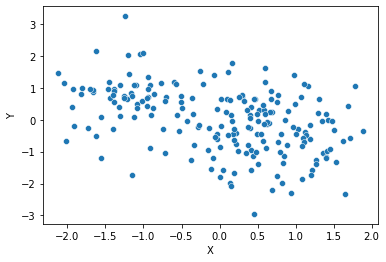

In [21]:
sns.scatterplot(data=scaled_data,x=df['X'],y=df['Y'])

In [35]:
model=KMeans(n_clusters=3, init="random", max_iter=300,random_state=12,verbose=1)
model.fit(scaled_data)

Initialization complete
Iteration 0, inertia 178.80246266380672
Iteration 1, inertia 137.7546067626728
Iteration 2, inertia 131.93762254831034
Iteration 3, inertia 131.6465414627425
Iteration 4, inertia 131.08321180049631
Iteration 5, inertia 130.62259236006417
Iteration 6, inertia 130.59757343196134
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 259.5754799821004
Iteration 1, inertia 164.1386397119304
Iteration 2, inertia 140.9897610428282
Iteration 3, inertia 133.69702130345664
Iteration 4, inertia 131.8257998779035
Iteration 5, inertia 131.4642912739743
Iteration 6, inertia 131.41148409071928
Iteration 7, inertia 131.28831455429838
Iteration 8, inertia 131.22444669471645
Iteration 9, inertia 131.17688021526115
Iteration 10, inertia 131.03401870914993
Iteration 11, inertia 130.9833030066596
Iteration 12, inertia 130.9335577970922
Iteration 13, inertia 130.87799677713832
Converged at iteration 13: strict convergence.
Initialization complete


KMeans(init='random', n_clusters=3, random_state=12, verbose=1)

In [36]:
clusters = model.predict(scaled_data)
clusters

array([1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2,
       1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0, 2])

In [37]:
df['clusterID']=clusters
df

,X,Y,clusterID
0,0.209811,-0.431702,1
1,0.406522,0.133872,0
2,0.985710,0.504275,0
3,-1.441502,0.681467,2
4,0.116014,1.491033,0
...,...,...,...
195,0.960391,-0.238193,0
196,-1.402632,0.767775,2
197,0.588997,-0.142463,0
198,0.082019,0.250496,0


<AxesSubplot:xlabel='X', ylabel='Y'>

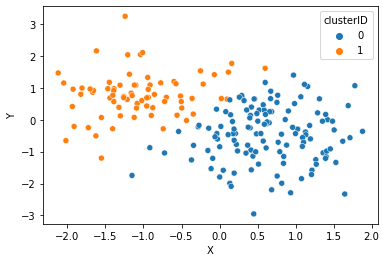

In [28]:
sns.scatterplot(data=scaled_data, x=df['X'], y=df['Y'], hue=df['clusterID'])

<AxesSubplot:xlabel='X', ylabel='Y'>

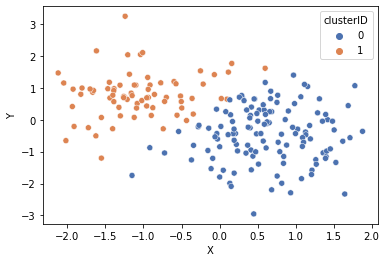

In [29]:
sns.scatterplot(data=scaled_data, x=df['X'], y=df['Y'], hue=df['clusterID'], palette="deep")

In [30]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'random',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 12,
 'tol': 0.0001,
 'verbose': 0}

In [31]:
model.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1])

In [39]:
model.cluster_centers_

array([[ 0.64291254,  0.3542083 ],
       [ 0.57928187, -1.12893182],
       [-1.16066014,  0.72467857]])

In [38]:
model.inertia_

130.59757343196134

In [40]:
SEE = []
for k in range(1,10):
    model = KMeans(n_clusters=k,init="random",random_state=12)
    model.fit(scaled_data)
    SEE.append(model.inertia_)
SEE

[399.9999999999998,
 195.3683614347397,
 130.59757343196134,
 105.74208660853375,
 87.7061192864045,
 73.70117924859841,
 64.22676429017821,
 56.310485645579334,
 49.97944821526047]

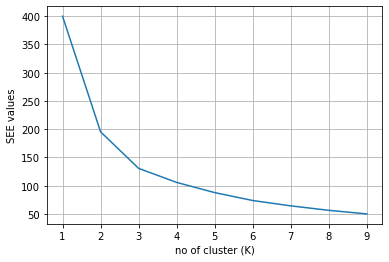

In [41]:
sns.lineplot(range(1,10),SEE)
plt.xlabel("no of cluster (K)")
plt.ylabel("SEE values")
plt.grid()

In [42]:
silhouette_score(scaled_data,model.labels_,metric="euclidean")


0.35028467789010576

In [43]:
SC = []
for k in range(2,10):
    model = KMeans(n_clusters=k,init="random",random_state=12)
    model.fit(scaled_data)
    score=silhouette_score(scaled_data,model.labels_,metric="euclidean") 
    SC.append(score)
SC
    

[0.45680192238116535,
 0.40125022600065685,
 0.3872657839837615,
 0.37398632407019866,
 0.352089238433011,
 0.36798483036418406,
 0.35531452812483466,
 0.35028467789010576]

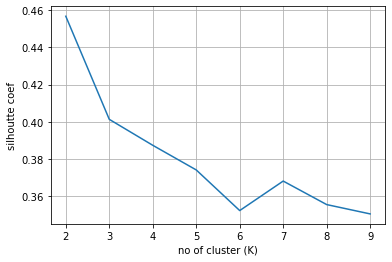